# Ejercicio: Clasificación de Quiebras.

In [ ]:
!pip install imblearn

In [1]:
import pandas as pd

- Para este ejercicio usaremos la siguiente base de datos: https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction?resource=download

In [2]:
df = pd.read_csv('data/data.csv')
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


Realiza los siguientes apartados:
- Explora la base de datos: ¿Está balanceada?, ¿las features están correladas?, etc.
- Divide la base de datos en test y train utilizando la función train_test_split de sklearn, dejando un 20% de las muestras para test. Esta division tiene que ser la misma para los siguientes ejercicios que realizaremos durante la clase.
- Normaliza los datos usando StandardScaler
- Entrena un modelo GradientBoostingClassifier de sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
- Valida el resultado en el conjunto de test en términos de acc, matriz de confusión, ROC, etc. ¿qué observas?
- Rebalancea las muestras de entrenamiento usando la técnica SMOTE. Para ello usa el siguiente código y repite las partes anteriores. Necesitas instalar con ```pip install imblearn```y reiniciar el kernel. Puedes encontrar más información del método en: https://imbalanced-learn.org/stable/over_sampling.html#smote-adasyn
```python
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)
```


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
y = df.iloc[:, 0]

In [5]:
x = df.iloc[:, 1:]

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
y.value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

Text(0.5, 1.0, 'Target feature - Bankrupt?')

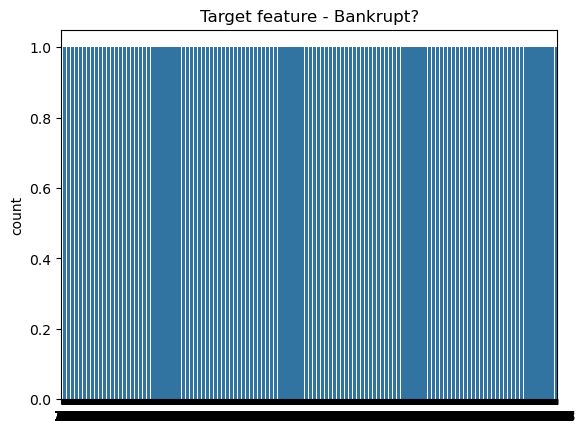

In [8]:
sns.countplot(y)
plt.title('Target feature - Bankrupt?')

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [11]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(5455, 95) (5455,) (1364, 95) (1364,)


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

In [14]:
clf = GradientBoostingClassifier(
    n_estimators=100, learning_rate=1.0, 
    max_depth=1, random_state=0).fit(x_train, y_train)

In [15]:
clf.score(x_test, y_test)

0.9633431085043989

In [16]:
y_pred = clf.predict(x_test)

In [17]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc

In [19]:
cm = confusion_matrix(y_test,y_pred)

In [20]:
cm = (cm.T / cm.sum(axis=1)).T

<Axes: >

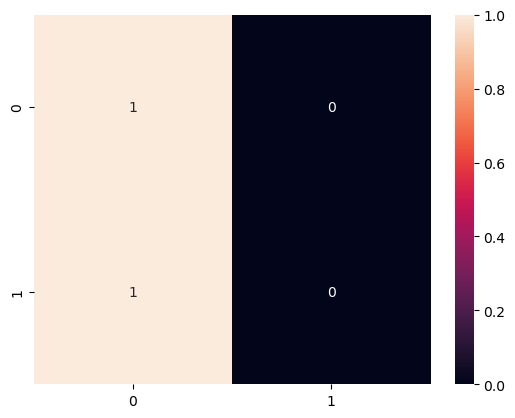

In [21]:
sns.heatmap(cm, annot=True)

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1314
           1       0.00      0.00      0.00        50

    accuracy                           0.96      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.96      0.95      1364



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


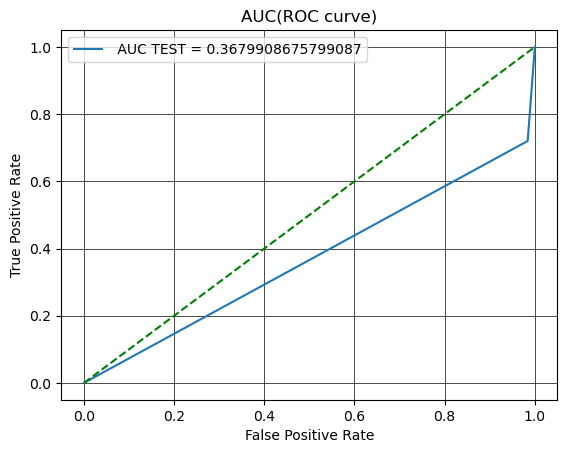

In [23]:
y_pred_prob = clf.predict_proba(x_test)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_pred_prob[:, 1])
auc_value = auc(test_fpr, test_tpr)

plt.grid()
plt.plot(test_fpr, test_tpr, label=f" AUC TEST = {auc_value}")
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()


In [24]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)


ImportError: cannot import name '_get_column_indices' from 'sklearn.utils' (/opt/conda/lib/python3.10/site-packages/sklearn/utils/__init__.py)

In [ ]:
sns.countplot(y_train)
plt.title('Target feature - Bankrupt?')

In [ ]:
clf = GradientBoostingClassifier(
    n_estimators=100, learning_rate=1.0, 
    max_depth=1, random_state=0).fit(x_train, y_train)

In [ ]:
clf.score(x_test, y_test)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
cm.sum(axis=1)

In [ ]:
cm = (cm.T / cm.sum(axis=1)).T

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
y_pred_prob

In [ ]:

y_pred_prob = clf.predict_proba(x_test)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_pred_prob[:, 1])
auc_value = auc(test_fpr, test_tpr)

plt.grid()
plt.plot(test_fpr, test_tpr, label=f" AUC TEST = {auc_value}")
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()
